[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[*********************100%%**********************]  1 of 1 completed
                           Open        High         Low       Close  \
Datetime                                                              
2024-01-02 09:30:00  250.080002  250.899994  244.410004  248.794006   
2024-01-02 10:00:00  248.779999  251.250000  248.050003  249.610001   
2024-01-02 10:30:00  249.600006  249.638199  246.820007  248.919998   
2024-01-02 11:00:00  248.899994  250.259995  248.339996  250.000000   
2024-01-02 11:30:00  249.994095  251.000000  249.900101  250.475403   
...                         ...         ...         ...         ...   
2024-01-26 13:30:00  183.490097  183.630005  182.291000  182.644394   
2024-01-26 14:00:00  182.654999  182.660004  182.100006  182.280106   
2024-01-26 14:30:00  182.300003  183.380005  182.119995  183.270004   
2024-01-26 15:00:00  183.270004  183.320007  182.380005  182.630005   
2024-01-26 15:30:00  182.629898  183.470001  182.610001  183.229904   

       

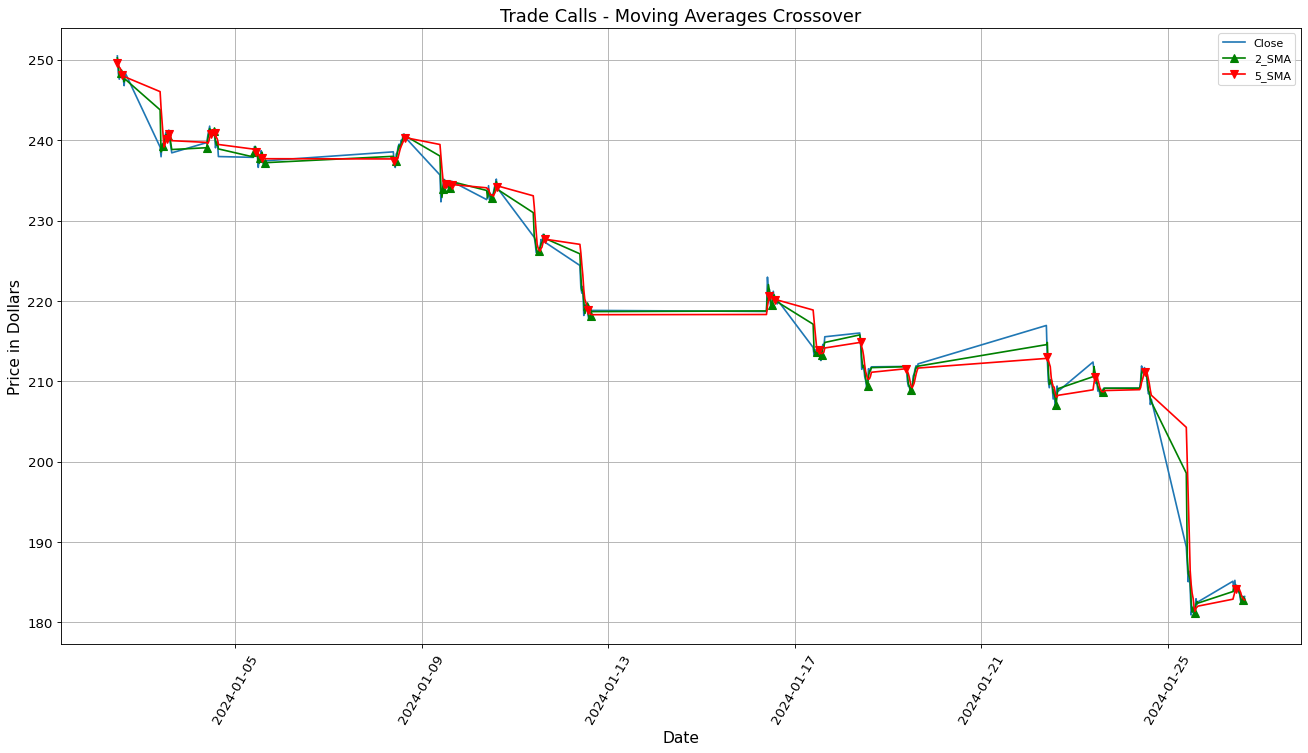

In [1]:
import pandas as pd
import requests 
from finVADER import finvader
import matplotlib.pyplot as plt
from pyfile.scrapestockdata import data_tsla, Trade_Buy, Trade_Sell

In [3]:
# Define the endpoint
url = 'https://newsapi.org/v2/everything?'

# Specify the query and number of returns
parameters = {
    'q': 'TSLA', # query phrase
    'sortBy': 'popularity', # articles from popular sources and publishers come first
    'pageSize': 100,  # maximum is 100 for developer version
    'apiKey': 'b1c121c11d4540299f888a29b82a96a8', # your own API key
}
# Make the request
response = requests.get(url, params=parameters)

In [4]:
# Convert the response to JSON format and store it in dataframe
data = pd.DataFrame(response.json())
news_df = pd.concat([data['articles'].apply(pd.Series)], axis=1)
news_df

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'MarketWatch'}",Philip van Doorn,Elon Musk has egg on his face,"Even Wedbush analyst Daniel Ives, normally a r...",https://www.marketwatch.com/story/elon-musk-ha...,https://images.mktw.net/im-18501351/social,2024-01-26T16:03:00Z,Shares of Tesla Inc. were down 26.5% for 2024 ...
1,"{'id': None, 'name': 'MarketWatch'}",Claudia Assis,Tesla warns Wall Street it could sell fewer ve...,Tesla Inc. warned investors late Wednesday tha...,https://www.marketwatch.com/story/tesla-warns-...,https://images.mktw.net/im-475346/social,2024-01-24T21:16:00Z,Tesla Inc. warned investors late Wednesday tha...
2,"{'id': None, 'name': 'MarketWatch'}",Claudia Assis,Elon Musk’s $56 billion Tesla pay package in l...,A Delaware judge late Tuesday voided Tesla Inc...,https://www.marketwatch.com/story/elon-musks-5...,https://images.mktw.net/im-73363001/social,2024-01-30T22:40:00Z,A Delaware judge late Tuesday voided Tesla Inc...
3,"{'id': None, 'name': 'MarketWatch'}",Mike Murphy,Tesla settles California hazardous-waste lawsu...,Tesla Inc. will pay $1.5 million to settle a l...,https://www.marketwatch.com/story/tesla-settle...,https://images.mktw.net/im-36268349/social,2024-02-02T02:38:00Z,Tesla Inc. will pay $1.5 million to settle a l...
4,"{'id': None, 'name': 'MarketWatch'}",Steve Goldstein,BYD shares slip as Tesla rival says profits su...,"BYD shares slumped 4% in Hong Kong on Tuesday,...",https://www.marketwatch.com/story/byd-shares-s...,https://images.mktw.net/im-14972718/social,2024-01-30T09:44:00Z,"BYD shares slumped 4% in Hong Kong on Tuesday,..."
...,...,...,...,...,...,...,...,...
95,"{'id': None, 'name': 'Forbes'}","Trefis Team, Contributor, \n Trefis Team, Cont...","Flat Since The Beginning Of 2023, What’s Next ...",Guess stock has been volatile lately due to a ...,https://www.forbes.com/sites/greatspeculations...,https://imageio.forbes.com/specials-images/ima...,2024-01-17T13:00:00Z,"[Note: GuessGES\r\n FY23 ended on Jan 28, 2023..."
96,"{'id': None, 'name': 'Forbes'}","Trefis Team, Contributor, \n Trefis Team, Cont...","Down 10% Since 2023, Will Sirius Stock Recoup ...",We expect Sirius XM stock to likely trade lowe...,https://www.forbes.com/sites/greatspeculations...,https://imageio.forbes.com/specials-images/ima...,2024-01-31T12:00:44Z,"LOS ANGELES, CALIFORNIA - JANUARY 26: (L-R) Sh..."
97,"{'id': None, 'name': 'Forbes'}","Trefis Team, Contributor, \n Trefis Team, Cont...",Should You Pick Union Pacific Stock At $250 Af...,Union Pacific (NYSE: UNP) reported its Q4 resu...,https://www.forbes.com/sites/greatspeculations...,https://imageio.forbes.com/specials-images/ima...,2024-02-01T12:30:00Z,"ROUND ROCK, TEXAS - APRIL 21: A Union Pacific ..."
98,"{'id': None, 'name': 'Forbes'}","Trefis Team, Contributor, \n Trefis Team, Cont...","Down 18% Since 2023, How Will CVX Stock Trend ...",We expect the company’s stock to likely trade ...,https://www.forbes.com/sites/greatspeculations...,https://imageio.forbes.com/specials-images/ima...,2024-02-01T17:00:53Z,The Chevron logo is being displayed on a smart...


In [5]:
final_news = news_df.loc[:,['publishedAt','title']]
final_news['publishedAt'] = pd.to_datetime(final_news['publishedAt'])
final_news.sort_values(by='publishedAt',inplace=True)
final_news

,publishedAt,title
93,2024-01-12 13:00:00+00:00,"Rising 15% Over The Last Year, Will Comcast St..."
36,2024-01-16 10:04:00+00:00,Tesla’s redesigned Model 3 is now available in...
63,2024-01-16 11:00:00+00:00,"Down 9% Year-To Date, Will A Q4 Earnings Beat ..."
16,2024-01-16 11:45:00+00:00,Another Wall Street bank has boosted its S&P 5...
45,2024-01-16 19:55:00+00:00,Beware of ‘pricey’ U.S. stocks as inflation ma...
...,...,...
8,2024-02-09 12:09:00+00:00,Nvidia’s now worth as much as the entire Chine...
26,2024-02-09 12:30:00+00:00,Big is ‘anything but beautiful’ as stocks clim...
75,2024-02-09 14:00:00+00:00,"Up 290% Since The Start Of 2023, Where Is Meta..."
92,2024-02-11 12:00:00+00:00,Stocks Rise Despite Higher Bond Yields


In [6]:
# Import BDay to determine business day's dates
from pandas.tseries.offsets import BDay

# to get the business day for which particular news headline should be used to make trade calls
def get_trade_open(date):
    curr_date_open = pd.to_datetime(date).floor('d').replace(hour=13,minute=30) - BDay(0)
    curr_date_close = pd.to_datetime(date).floor('d').replace(hour=20,minute=0) - BDay(0)
    
    prev_date_close = (curr_date_open - BDay()).replace(hour=20,minute=0)
    next_date_open = (curr_date_close + BDay()).replace(hour=13,minute=30)
    
    if ((pd.to_datetime(date)>=prev_date_close) & (pd.to_datetime(date)<curr_date_open)):
        return curr_date_open
    elif ((pd.to_datetime(date)>=curr_date_close) & (pd.to_datetime(date)<next_date_open)):
        return next_date_open
    else:
        return None

In [7]:
 # Apply the above function to get the trading time for each news headline
final_news["trading_time"] = final_news["publishedAt"].apply(get_trade_open)

final_news = final_news[pd.notnull(final_news['trading_time'])]
final_news['Date'] = pd.to_datetime(pd.to_datetime(final_news['trading_time']).dt.date)

final_news['compound_finvader_score'] = final_news['title'].apply(finvader,use_sentibignomics = True, use_henry = True, indicator="compound")
final_news

C:\Users\DELL\AppData\Local\Temp\ipykernel_4668\350999672.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_news['Date'] = pd.to_datetime(pd.to_datetime(final_news['trading_time']).dt.date)
C:\Users\DELL\AppData\Local\Temp\ipykernel_4668\350999672.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_news['compound_finvader_score'] = final_news['title'].apply(finvader,use_sentibignomics = True, use_henry = True, indicator="compound")


,publishedAt,title,trading_time,Date,compound_finvader_score
93,2024-01-12 13:00:00+00:00,"Rising 15% Over The Last Year, Will Comcast St...",2024-01-12 13:30:00+00:00,2024-01-12,0.5994
36,2024-01-16 10:04:00+00:00,Tesla’s redesigned Model 3 is now available in...,2024-01-16 13:30:00+00:00,2024-01-16,0.0155
63,2024-01-16 11:00:00+00:00,"Down 9% Year-To Date, Will A Q4 Earnings Beat ...",2024-01-16 13:30:00+00:00,2024-01-16,0.3612
16,2024-01-16 11:45:00+00:00,Another Wall Street bank has boosted its S&P 5...,2024-01-16 13:30:00+00:00,2024-01-16,0.3612
22,2024-01-17 10:02:00+00:00,Here are the 10 electric vehicles that sold th...,2024-01-17 13:30:00+00:00,2024-01-17,0.0000
...,...,...,...,...,...
28,2024-02-09 11:35:00+00:00,The stock market right now resembles the Y2K s...,2024-02-09 13:30:00+00:00,2024-02-09,0.2926
8,2024-02-09 12:09:00+00:00,Nvidia’s now worth as much as the entire Chine...,2024-02-09 13:30:00+00:00,2024-02-09,0.0116
26,2024-02-09 12:30:00+00:00,Big is ‘anything but beautiful’ as stocks clim...,2024-02-09 13:30:00+00:00,2024-02-09,0.5431
92,2024-02-11 12:00:00+00:00,Stocks Rise Despite Higher Bond Yields,2024-02-12 13:30:00+00:00,2024-02-12,0.6111


In [8]:
final_news = final_news[(final_news[['compound_finvader_score']] != 0).all(axis=1)].reset_index(drop=True)
final_news

,publishedAt,title,trading_time,Date,compound_finvader_score
0,2024-01-12 13:00:00+00:00,"Rising 15% Over The Last Year, Will Comcast St...",2024-01-12 13:30:00+00:00,2024-01-12,0.5994
1,2024-01-16 10:04:00+00:00,Tesla’s redesigned Model 3 is now available in...,2024-01-16 13:30:00+00:00,2024-01-16,0.0155
2,2024-01-16 11:00:00+00:00,"Down 9% Year-To Date, Will A Q4 Earnings Beat ...",2024-01-16 13:30:00+00:00,2024-01-16,0.3612
3,2024-01-16 11:45:00+00:00,Another Wall Street bank has boosted its S&P 5...,2024-01-16 13:30:00+00:00,2024-01-16,0.3612
4,2024-01-17 10:22:00+00:00,Tesla cuts prices in Germany after reductions ...,2024-01-17 13:30:00+00:00,2024-01-17,-0.2960
...,...,...,...,...,...
58,2024-02-09 11:35:00+00:00,The stock market right now resembles the Y2K s...,2024-02-09 13:30:00+00:00,2024-02-09,0.2926
59,2024-02-09 12:09:00+00:00,Nvidia’s now worth as much as the entire Chine...,2024-02-09 13:30:00+00:00,2024-02-09,0.0116
60,2024-02-09 12:30:00+00:00,Big is ‘anything but beautiful’ as stocks clim...,2024-02-09 13:30:00+00:00,2024-02-09,0.5431
61,2024-02-11 12:00:00+00:00,Stocks Rise Despite Higher Bond Yields,2024-02-12 13:30:00+00:00,2024-02-12,0.6111


In [9]:
# Retaining extreme (max and min) compound scores for same Day news headlines
unique_dates = final_news['Date'].unique()
grouped_dates = final_news.groupby(['Date'])
keys_dates = list(grouped_dates.groups.keys())

max_cs = []
min_cs = []

for key in grouped_dates.groups.keys():
    data = grouped_dates.get_group(key)
    if data["compound_finvader_score"].max() > 0:
        max_cs.append(data["compound_finvader_score"].max())
    elif data["compound_finvader_score"].max() < 0:
        max_cs.append(0)
    
    if data["compound_finvader_score"].min() < 0:
        min_cs.append(data["compound_finvader_score"].min())
    elif data["compound_finvader_score"].min() > 0:
        min_cs.append(0)

In [10]:
extreme_scores_dict = {'Date':keys_dates,'max_scores':max_cs,'min_scores':min_cs}
extreme_scores_df = pd.DataFrame(extreme_scores_dict)

#summing and calculating Vader score
final_scores = []
for i in range(len(extreme_scores_df)):
    final_scores.append(extreme_scores_df['max_scores'].values[i] + extreme_scores_df['min_scores'].values[i])

extreme_scores_df['final_scores'] = final_scores

extreme_scores_df

,Date,max_scores,min_scores,final_scores
0,2024-01-12,0.5994,0.0000,0.5994
1,2024-01-16,0.3612,0.0000,0.3612
2,2024-01-17,0.3705,-0.2960,0.0745
3,2024-01-18,0.5994,-0.3612,0.2382
4,2024-01-19,0.3612,-0.3421,0.0191
5,2024-01-22,0.2767,-0.1053,0.1714
6,2024-01-23,0.6079,-0.3496,0.2583
7,2024-01-24,0.3653,-0.0580,0.3073
8,2024-01-25,0.3643,-0.0989,0.2654
9,2024-01-26,0.3643,-0.7594,-0.3951


In [11]:
#Using final compound VADER scores with threshold to generate trade calls
# VADER trade calls - with threshold
finvader_Buy=[]
finvader_Sell=[]
for i in range(len(extreme_scores_df)):
    if extreme_scores_df['final_scores'].values[i] > 0.33:
        print("Trade Call for {row} is Buy.".format(row=extreme_scores_df['Date'].iloc[i].date()))
        finvader_Buy.append(extreme_scores_df['Date'].iloc[i].date())
    elif extreme_scores_df['final_scores'].values[i] < -0.33:
        print("Trade Call for {row} is Sell.".format(row=extreme_scores_df['Date'].iloc[i].date()))
        finvader_Sell.append(extreme_scores_df['Date'].iloc[i].date())

finvader_buy = []
for i in range(len(data_tsla)):
    if data_tsla.index[i].date() in finvader_Buy:
        finvader_buy.append(i)
        
finvader_sell = []
for i in range(len(data_tsla)):
    if data_tsla.index[i].date() in finvader_Sell:
        finvader_sell.append(i)

Trade Call for 2024-01-12 is Buy.
Trade Call for 2024-01-16 is Buy.
Trade Call for 2024-01-26 is Sell.
Trade Call for 2024-01-29 is Buy.
Trade Call for 2024-02-01 is Buy.
Trade Call for 2024-02-02 is Buy.
Trade Call for 2024-02-05 is Buy.
Trade Call for 2024-02-06 is Buy.
Trade Call for 2024-02-07 is Buy.
Trade Call for 2024-02-09 is Buy.
Trade Call for 2024-02-12 is Buy.


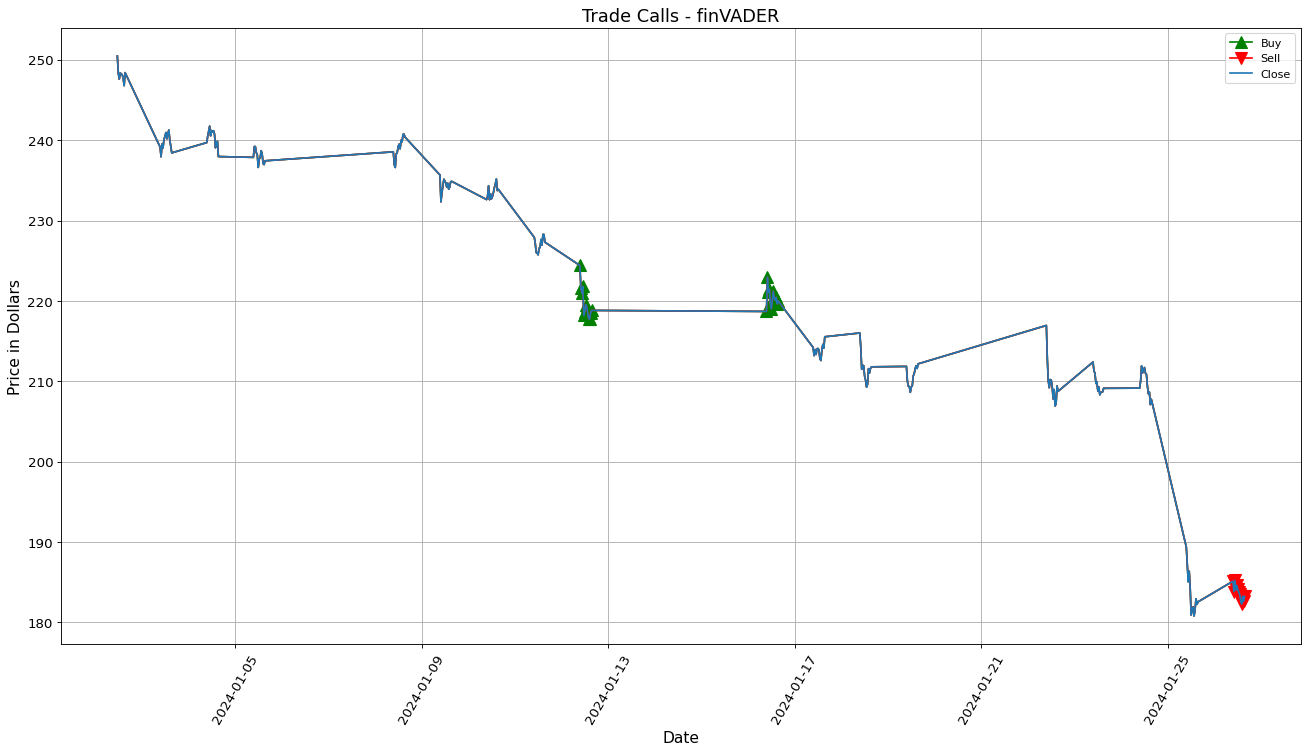

In [12]:
plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_tsla.index, data_tsla['Close'],'-^', markevery=finvader_buy, ms=10, color='green')
plt.plot(data_tsla.index, data_tsla['Close'],'-v', markevery=finvader_sell, ms=10, color='red')
plt.plot(data_tsla.index, data_tsla['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.xticks(rotation=60,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - finVADER', fontsize = 16)
plt.legend(['Buy','Sell','Close'])
plt.grid()
plt.show() 

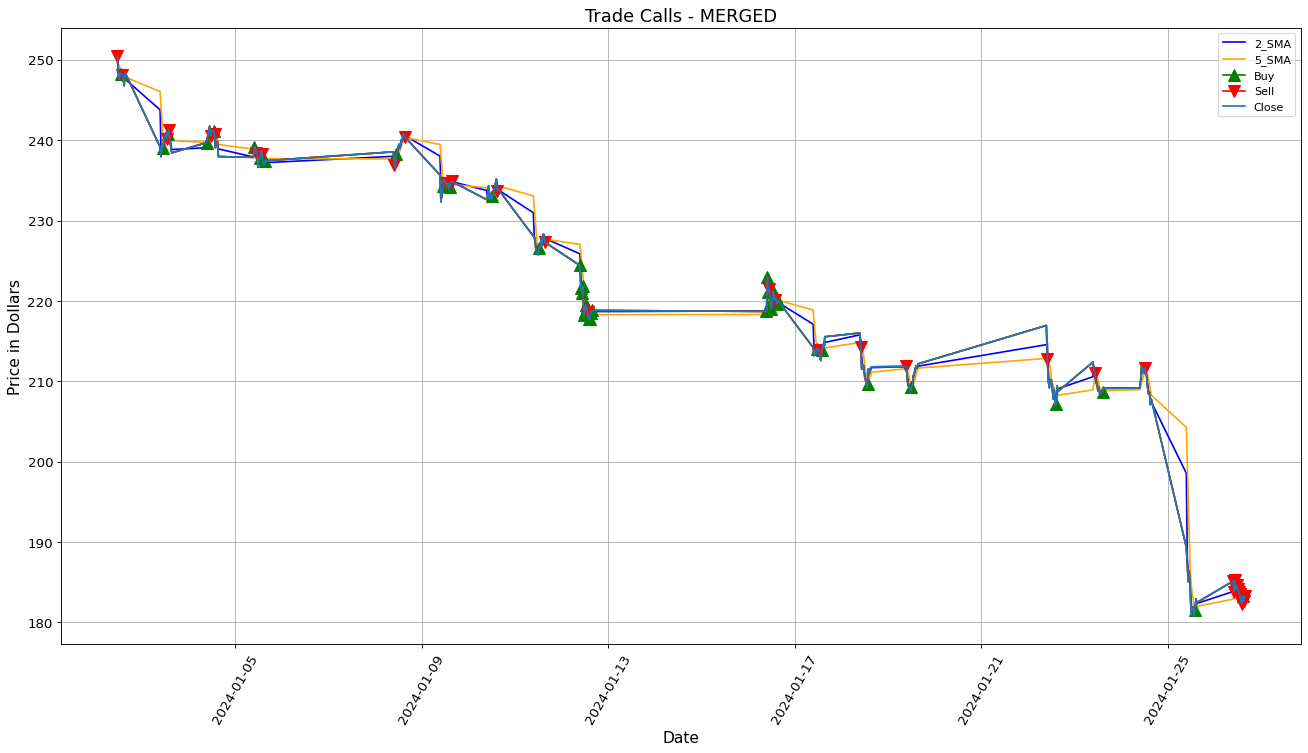

In [13]:
#prioritising SMA signals
final_buy = list(set(Trade_Buy + finvader_buy) - set(Trade_Sell)) 
final_sell = list(set(Trade_Sell + finvader_sell) - set(Trade_Buy))

plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_tsla.index, data_tsla['2_SMA'], color='blue')
plt.plot(data_tsla.index, data_tsla['5_SMA'], color='orange')
plt.plot(data_tsla.index, data_tsla['Close'],'-^', markevery=final_buy, ms=10, color='green')
plt.plot(data_tsla.index, data_tsla['Close'],'-v', markevery=final_sell, ms=10, color='red')
plt.plot(data_tsla.index, data_tsla['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.xticks(rotation=60,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - MERGED', fontsize = 16)
plt.legend(['2_SMA','5_SMA','Buy','Sell','Close'])
plt.grid()
plt.show() 

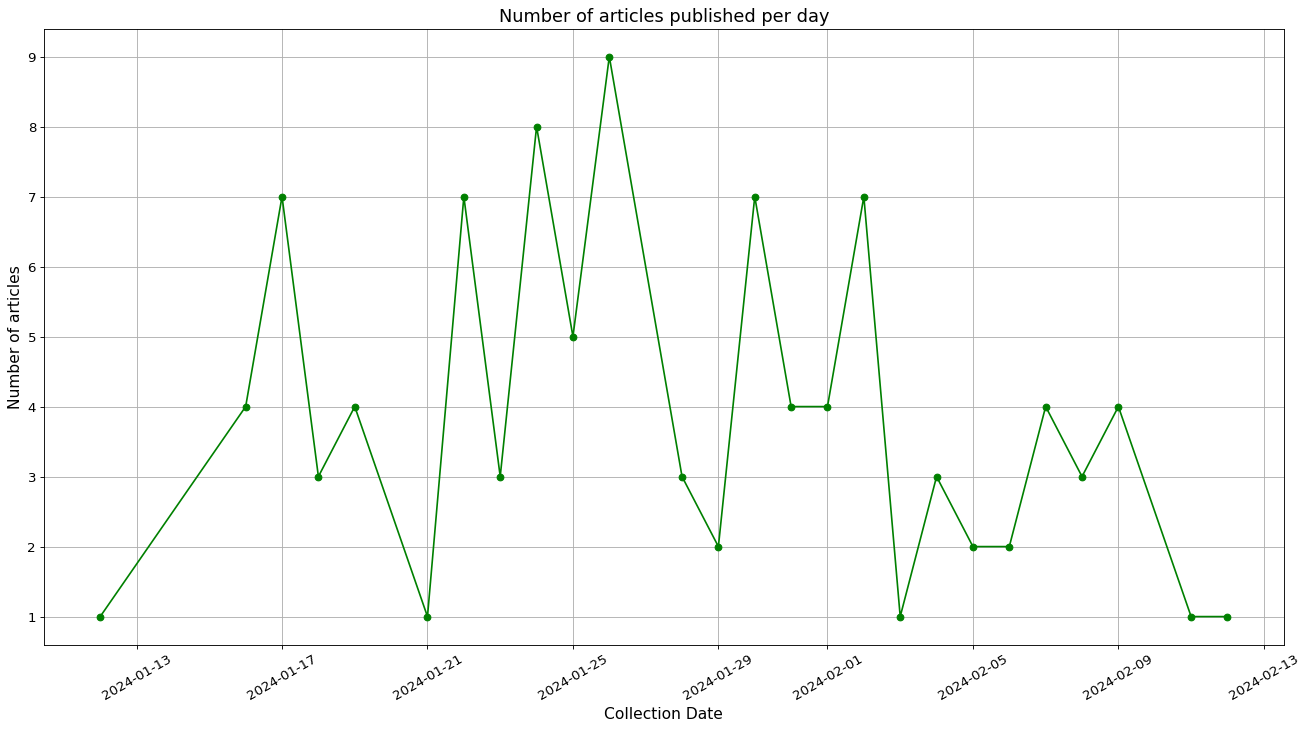

In [14]:
import matplotlib.pyplot as plt

# Đảm bảo rằng cột 'date' là kiểu dữ liệu datetime
news_df['publishedAt'] = pd.to_datetime(news_df['publishedAt'])
news_df['date'] = news_df['publishedAt'].dt.date

# Tính toán số lượng content mỗi ngày
content_count = news_df.groupby('date').size()

# Vẽ biểu đồ
plt.figure(figsize=(20,10), dpi=80)
content_count.plot(kind='line', marker='o', color='green')
plt.title('Number of articles published per day', fontsize = 16)
plt.xlabel('Collection Date', fontsize=14)
plt.ylabel('Number of articles',fontsize = 14)
plt.xticks(rotation=30,fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()